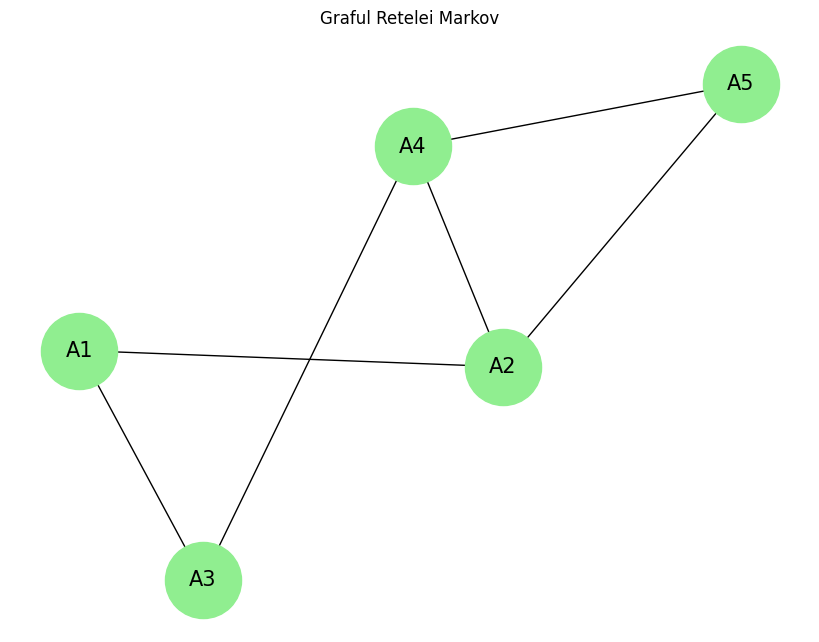

Clicile modelului sunt: [['A4', 'A2', 'A5'], ['A4', 'A3'], ['A1', 'A2'], ['A1', 'A3']]
Probabilitatea comună a variabilelor este:
+-------+-------+-------+-------+-------+-----------------------+
| A1    | A2    | A3    | A4    | A5    |   phi(A1,A2,A3,A4,A5) |
+=======+=======+=======+=======+=======+=======================+
| A1(0) | A2(0) | A3(0) | A4(0) | A5(0) |                0.0000 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(0) | A4(0) | A5(1) |                0.0000 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(0) | A4(1) | A5(0) |                0.0001 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(0) | A4(1) | A5(1) |                0.0006 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(1) | A4(0) | A5(0) |                0.0000 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2

In [9]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

model = MarkovNetwork()

model.add_edges_from([('A1', 'A2'), ('A1', 'A3'), 
                      ('A2', 'A4'), ('A2', 'A5'), 
                      ('A3', 'A4'), ('A4', 'A5')])

graph = nx.Graph()
graph.add_edges_from([('A1', 'A2'), ('A1', 'A3'), 
                      ('A2', 'A4'), ('A2', 'A5'), 
                      ('A3', 'A4'), ('A4', 'A5')])

plt.figure(figsize=(8, 6))
nx.draw(graph, with_labels=True, node_color='lightgreen', node_size=3000, font_size=15)
plt.title("Graful Retelei Markov")
plt.show()

cliques = list(nx.find_cliques(graph))
print("Clicile modelului sunt:", cliques)

def normalize(values):
    total = np.sum(values)
    return values / total if total > 0 else values

phi_A1_A2 = DiscreteFactor(variables=['A1', 'A2'], cardinality=[2, 2], 
                           values=normalize(np.exp([0, 1, 1, 2])))
phi_A1_A3 = DiscreteFactor(variables=['A1', 'A3'], cardinality=[2, 2], 
                           values=normalize(np.exp([0, 1, 1, 2])))
phi_A2_A4 = DiscreteFactor(variables=['A2', 'A4'], cardinality=[2, 2], 
                           values=normalize(np.exp([0, 1, 1, 2])))
phi_A2_A5 = DiscreteFactor(variables=['A2', 'A5'], cardinality=[2, 2], 
                           values=normalize(np.exp([0, 1, 1, 2])))
phi_A3_A4 = DiscreteFactor(variables=['A3', 'A4'], cardinality=[2, 2], 
                           values=normalize(np.exp([0, 1, 1, 2])))
phi_A4_A5 = DiscreteFactor(variables=['A4', 'A5'], cardinality=[2, 2], 
                           values=normalize(np.exp([0, 1, 1, 2])))

model.add_factors(phi_A1_A2, phi_A1_A3, phi_A2_A4, phi_A2_A5, phi_A3_A4, phi_A4_A5)

inference = BeliefPropagation(model)

joint_prob = inference.query(variables=['A1', 'A2', 'A3', 'A4', 'A5'], joint=True)
print("Probabilitatea comuna a variabilelor este:")
print(joint_prob)

map_states = inference.map_query(variables=['A1', 'A2', 'A3', 'A4', 'A5'])
print("Starile de probabilitate maxima:", map_states)
